In [ ]:
案例1 ：不同行业工作年限与收入的线性回归模型
案例背景
通常来说，收入都会随着工作年限的增长而增长，而在不同的行业中收入的增长速度都会有所不同，
本小节就是来通过一元线性回归模型来探寻工作年限对收入的影响，也即搭建收入预测模型，同时比较多个行业的收入预测模型来分析各个行业的特点。

这里我将会使用五种不同的模型，普通线性回归，岭回归，lasson回归，弹性网络和多项式回归，
并且使用不同的模型进行预测并进行数据的可视化，另外还会对不同的模型之间进行对比分析

开始分析不同行业工作年限与收入的关系...

IT行业分析结果:
------------------------------
线性回归: R²=0.9969, RMSE=1083.13
岭回归: R²=0.9966, RMSE=1124.29
Lasso回归: R²=0.9969, RMSE=1083.15
弹性网络: R²=0.9967, RMSE=1116.06
多项式回归: R²=0.9965, RMSE=1139.46

金融行业分析结果:
------------------------------
线性回归: R²=0.9894, RMSE=2230.34
岭回归: R²=0.9899, RMSE=2180.45
Lasso回归: R²=0.9894, RMSE=2230.31
弹性网络: R²=0.9898, RMSE=2190.36
多项式回归: R²=0.9859, RMSE=2568.00

汽车制造分析结果:
------------------------------
线性回归: R²=0.9975, RMSE=780.69
岭回归: R²=0.9976, RMSE=752.77
Lasso回归: R²=0.9975, RMSE=780.67
弹性网络: R²=0.9976, RMSE=758.25
多项式回归: R²=0.9980, RMSE=687.90

餐饮服务分析结果:
------------------------------
线性回归: R²=0.9990, RMSE=374.48
岭回归: R²=0.9989, RMSE=397.85
Lasso回归: R²=0.9990, RMSE=374.50
弹性网络: R²=0.9989, RMSE=393.15
多项式回归: R²=0.9989, RMSE=383.32


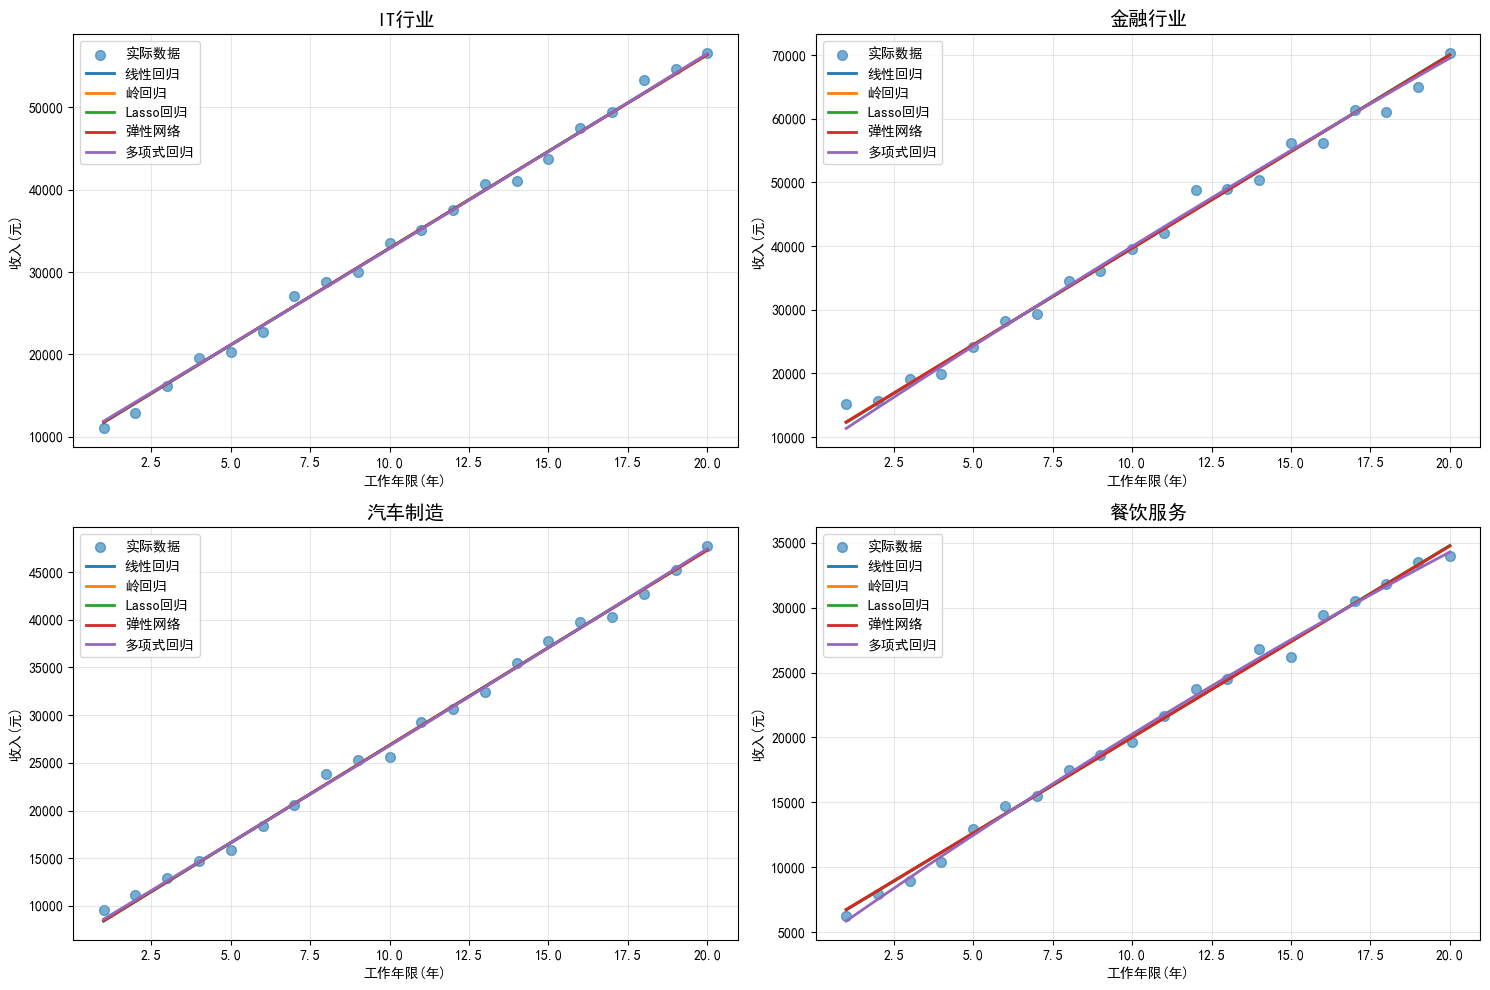


模型性能汇总:
  行业      模型     R²得分        RMSE
IT行业    线性回归 0.996866 1083.125053
IT行业     岭回归 0.996623 1124.287082
IT行业 Lasso回归 0.996865 1083.153003
IT行业    弹性网络 0.996672 1116.060858
IT行业   多项式回归 0.996531 1139.464715
金融行业    线性回归 0.989399 2230.337982
金融行业     岭回归 0.989868 2180.445704
金融行业 Lasso回归 0.989399 2230.311547
金融行业    弹性网络 0.989776 2190.359395
金融行业   多项式回归 0.985946 2567.998000
汽车制造    线性回归 0.997459  780.690674
汽车制造     岭回归 0.997638  752.770544
汽车制造 Lasso回归 0.997460  780.668443
汽车制造    弹性网络 0.997603  758.253337
汽车制造   多项式回归 0.998027  687.902327
餐饮服务    线性回归 0.998996  374.477151
餐饮服务     岭回归 0.998867  397.849169
餐饮服务 Lasso回归 0.998996  374.502148
餐饮服务    弹性网络 0.998894  393.145183
餐饮服务   多项式回归 0.998948  383.316616

各行业10年工作经验收入预测:
----------------------------------------
IT行业: 32898.23元 (线性回归)
金融行业: 39657.35元 (岭回归)
汽车制造: 26798.63元 (多项式回归)
餐饮服务: 20002.73元 (线性回归)

各行业收入增长率比较:
------------------------------
IT行业: 年增长2353.23元 (6.91%)
金融行业: 年增长3039.17元 (7.39%)
汽车制造: 年增长2049.18元 (7.32%)
餐饮服务:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def create_sample_data():
    """创建示例数据"""
    np.random.seed(42)
    industries = ['IT行业', '金融行业', '汽车制造', '餐饮服务']
    datasets = {}
    for industry in industries:
        work_years = np.arange(1, 21)
        if industry == 'IT行业':
            income = 8000 + 2500 * work_years + np.random.normal(0, 1000, 20)
        elif industry == '金融行业':
            income = 10000 + 3000 * work_years + np.random.normal(0, 1500, 20)
        elif industry == '汽车制造':
            income = 7000 + 2000 * work_years + np.random.normal(0, 800, 20)
        else:
            income = 5000 + 1500 * work_years + np.random.normal(0, 500, 20)
        datasets[industry] = pd.DataFrame({
            '工作年限': work_years,
            '收入': income
        })
    return datasets
def get_models():
    """定义五种回归模型"""
    return {
        '线性回归': LinearRegression(),
        '岭回归': Ridge(alpha=1.0),
        'Lasso回归': Lasso(alpha=0.1, max_iter=10000),
        '弹性网络': ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000),
        '多项式回归': Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])
    }
def evaluate_model(model, X_test, y_test):
    """评估模型性能"""
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse

def analyze_industry(datasets):
    """分析所有行业"""
    results = {}
    for industry, df in datasets.items():
        print(f"\n{industry}分析结果:")
        print("-" * 30)
        X = df[['工作年限']]
        y = df['收入']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        industry_results = {}
        models = get_models()
        for name, model in models.items():
            model.fit(X_train, y_train)
            r2, rmse = evaluate_model(model, X_test, y_test)
            industry_results[name] = {'model': model, 'r2': r2, 'rmse': rmse}
            print(f"{name}: R²={r2:.4f}, RMSE={rmse:.2f}")
        
        results[industry] = industry_results
    return results
def plot_comparison(datasets, results):
    """绘制比较图表"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    for idx, (industry, df) in enumerate(datasets.items()):
        X = df[['工作年限']]
        y = df['收入']
        # 绘制散点图
        axes[idx].scatter(X, y, alpha=0.6, s=50, label='实际数据')
        # 绘制拟合曲线
        x_range = np.linspace(X.min().iloc[0], X.max().iloc[0], 100).reshape(-1, 1)
        for model_name, result in results[industry].items():
            y_pred = result['model'].predict(x_range)
            axes[idx].plot(x_range, y_pred, label=model_name, linewidth=2)
        
        axes[idx].set_title(f'{industry}', fontsize=14)
        axes[idx].set_xlabel('工作年限(年)')
        axes[idx].set_ylabel('收入(元)')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
def create_summary_table(results):
    """创建汇总表格"""
    summary_data = []
    for industry, models in results.items():
        for model_name, result in models.items():
            summary_data.append({
                '行业': industry,
                '模型': model_name,
                'R²得分': result['r2'],
                'RMSE': result['rmse']
            })
    
    return pd.DataFrame(summary_data)

def predict_incomes(results, years=10):
    """预测各行业收入"""
    print(f"\n各行业{years}年工作经验收入预测:")
    print("-" * 40)
    
    predictions = []
    for industry, models in results.items():
        # 选择最佳模型
        best_model_name = max(models.items(), key=lambda x: x[1]['r2'])[0]
        best_model = models[best_model_name]['model']
        
        # 预测收入
        predicted_income = best_model.predict([[years]])[0]
        predictions.append({
            '行业': industry,
            '工作年限': years,
            '预测收入': f"{predicted_income:.2f}元",
            '最佳模型': best_model_name
        })
        
        print(f"{industry}: {predicted_income:.2f}元 ({best_model_name})")
    return pd.DataFrame(predictions)
def compare_growth_rates(results, datasets):
    """比较各行业增长率"""
    print("\n各行业收入增长率比较:")
    print("-" * 30)
    growth_rates = []
    for industry, df in datasets.items():
        # 使用线性回归系数作为增长率
        linear_model = results[industry]['线性回归']['model']
        growth_rate = linear_model.coef_[0]
        avg_income = df['收入'].mean()
        growth_pct = (growth_rate / avg_income) * 100
        
        growth_rates.append({
            '行业': industry,
            '年增长率(元)': f"{growth_rate:.2f}",
            '年增长率(%)': f"{growth_pct:.2f}%",
            '平均收入': f"{avg_income:.2f}元"
        }) 
        print(f"{industry}: 年增长{growth_rate:.2f}元 ({growth_pct:.2f}%)")
    return pd.DataFrame(growth_rates)

# 主程序
def main():
    print("开始分析不同行业工作年限与收入的关系...")
    # 1. 创建数据
    datasets = create_sample_data()
    # 2. 分析模型
    results = analyze_industry(datasets)
    # 3. 可视化
    plot_comparison(datasets, results)
    # 4. 创建汇总表
    summary_df = create_summary_table(results)
    print("\n模型性能汇总:")
    print(summary_df.to_string(index=False))
    # 5. 预测收入
    predict_df = predict_incomes(results, years=10)
    # 6. 比较增长率
    growth_df = compare_growth_rates(results, datasets)
    # 7. 保存结果
    with pd.ExcelWriter('行业收入分析结果.xlsx') as writer:
        for industry, df in datasets.items():
            df.to_excel(writer, sheet_name=f'{industry}数据', index=False)
        summary_df.to_excel(writer, sheet_name='模型比较', index=False)
        predict_df.to_excel(writer, sheet_name='收入预测', index=False)
        growth_df.to_excel(writer, sheet_name='增长率比较', index=False)
    print("\n分析完成！结果已保存到 '行业收入分析结果.xlsx'")
    return datasets, results, summary_df, predict_df, growth_df
# 执行分析
if __name__ == "__main__":
    datasets, results, summary_df, predict_df, growth_df = main()

In [ ]:
因此可以明确看出，金融行业收入年增长率最高，并且10年工作经验的收入也是最高
各行业特点分析
1. 金融行业 - 高收入领军者
收入水平：最高（39,657元）                 增长率：最高（3,039元/年，7.39%）
特点分析：
典型的"高起点、高增长"行业                 专业壁垒高，经验积累价值大
可能涉及投资、风险管理等高附加值工作 
10年工作经验收入接近4万元，显示强劲的薪资上升空间

2. IT行业 - 稳健的技术型行业
收入水平：第二高（32,898元）               增长率：中等偏上（2,353元/年，6.91%）
特点分析：
技术驱动型行业，技能更新快                 增长率相对稳定但略低于金融业
反映技术人才的市场价值持续走高
工作10年收入超3万元，体现技术经验的溢价

3. 汽车制造 - 稳定的传统制造业
收入水平：第三（26,799元）                 增长率：较高（2,049元/年，7.32%）
特点分析：
传统制造业代表，增长率意外较高（7.32%）    可能反映制造业转型升级带来的薪资提升
使用多项式回归模型，说明收入增长可能存在非线性特征
技术工人和经验工程师的价值得到体现

4. 餐饮服务 - 基础服务业
收入水平：最低（20,003元）                 增长率：最低（1,478元/年，7.13%）
特点分析：
入门门槛相对较低，收入基数小               增长率绝对值最低，但百分比并不低（7.13%）
反映服务业薪资增长相对平缓
10年工作经验收入刚达2万元，显示行业薪资天花板较低

In [ ]:
案例2：客户价值预测模型
案例背景
这里以信用卡客户的客户价值来解释下客户价值预测的具体含义：
客户价值预测就是指客户未来一段时间能带来多少利润，其利润的来源可能来自于信用卡的年费、取现手续费、分期手续费、境外交易手续费用等。
而分析出客户的价值后，在进行营销、电话接听、催收、产品咨询等各项服务时，就可以针对高价值的客户进行区别于普通客户的服务，
有助于进一步挖掘这些高价值客户的价值，并提高这些高价值客户的忠诚度。

客户价值预测模型分析
成功读取客户价值数据表
数据形状: (128, 6)
实际列名: ['客户价值', '历史贷款金额', '贷款次数', '学历', '月收入', '性别']

数据预览:
   客户价值  历史贷款金额  贷款次数  学历    月收入  性别
0  1150    6488     2   2   9567   1
1  1157    5194     4   2  10767   0
2  1163    7066     3   2   9317   0
3   983    3550     3   2  10517   0
4  1205    7847     3   3  11267   1

数据列名: ['客户价值', '历史贷款金额', '贷款次数', '学历', '月收入', '性别']
使用目标变量: 客户价值

特征数量: 5
样本数量: 128
特征名称: ['历史贷款金额', '贷款次数', '学历', '月收入', '性别']

模型性能比较
--------------------------------------------------

训练线性回归...
线性回归........ R²: 0.5803 | RMSE: 156.64 | MAE: 129.75

训练岭回归...
岭回归......... R²: 0.5827 | RMSE: 156.19 | MAE: 129.36

训练Lasso回归...
Lasso回归..... R²: 0.5807 | RMSE: 156.56 | MAE: 129.70

训练随机森林...
随机森林........ R²: 0.6424 | RMSE: 144.57 | MAE: 121.57

训练梯度提升...
梯度提升........ R²: 0.5433 | RMSE: 163.39 | MAE: 126.87


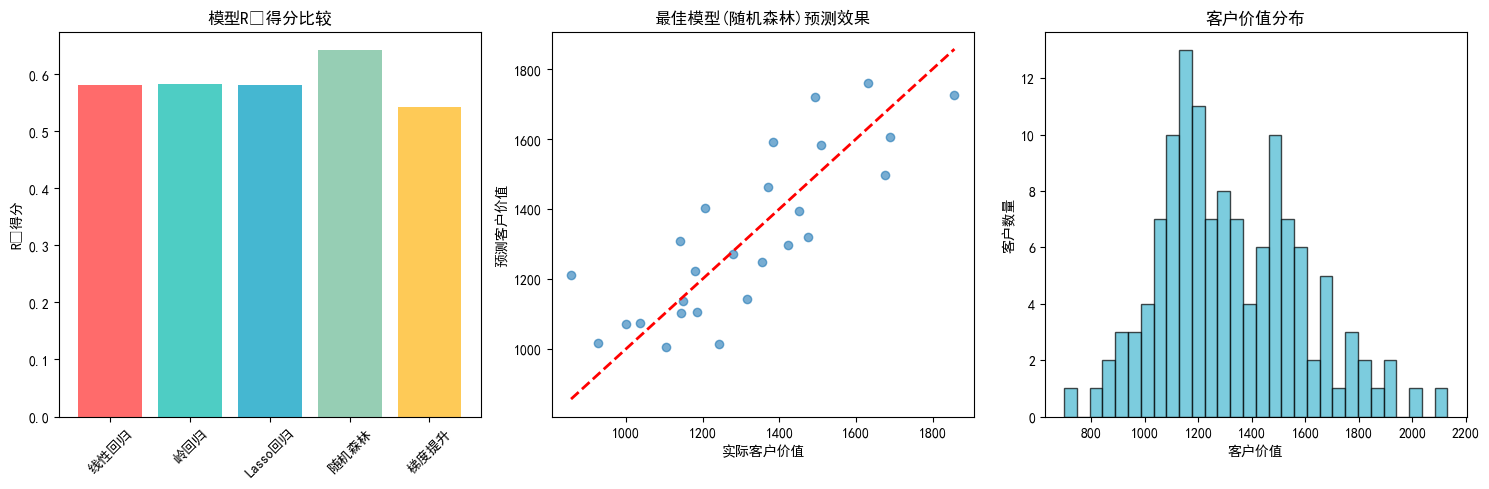


特征重要性分析
------------------------------
随机森林特征重要性排序:
    特征      重要性
历史贷款金额 0.387504
   月收入 0.357606
  贷款次数 0.117675
    学历 0.106706
    性别 0.030509


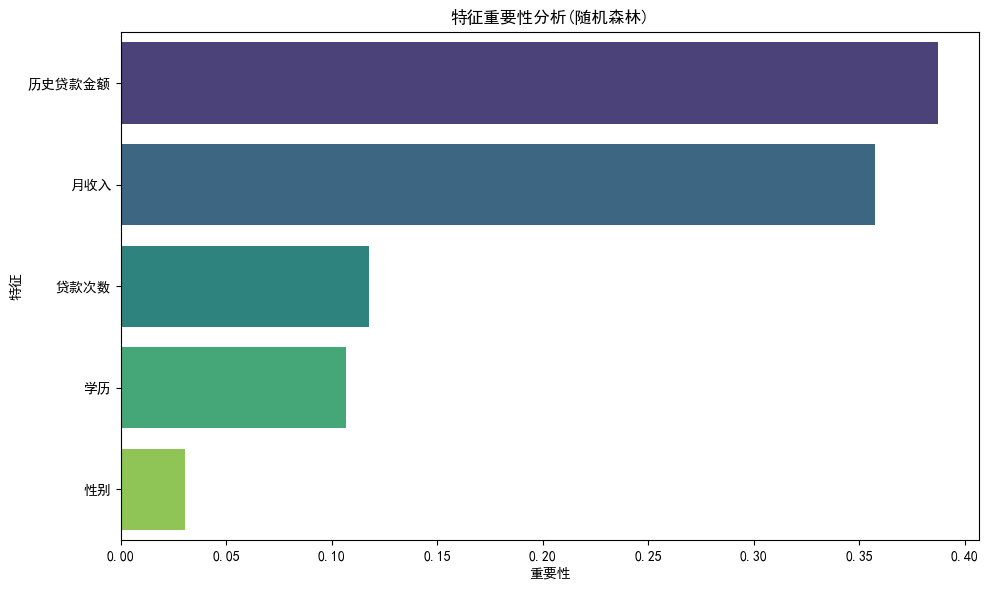


客户价值分群分析
------------------------------
客户价值分群统计:
         预测价值         历史贷款金额  贷款次数
         mean count               
价值等级                              
低价值   1061.33    32  5053.94  2.59
中价值   1226.15    32  6368.41  2.72
高价值   1377.66    32  6275.84  3.09
超高价值  1641.30    32  7975.94  3.69


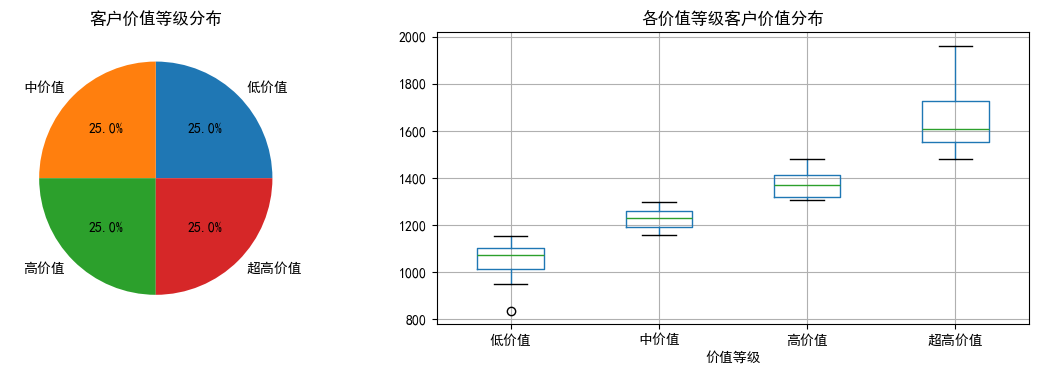


业务建议:
1. 最佳预测模型: 随机森林
2. 高价值客户占比: 25.0%
3. 平均客户价值: 1326.61

分析结果已保存到 '客户价值预测分析结果.xlsx'

实际特征名称: ['历史贷款金额', '贷款次数', '学历', '月收入', '性别']
特征数量: 5
示例客户数据: [0, 80, 0, 50.0, 0]

示例客户预测价值: 950.26


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def load_customer_data():
    """加载客户价值数据"""
    try:
        file_path = r"d:\桌面\商业数据分析\@Python大数据分析与机器学习商业案例实战\第3章 线性回归模型\源代码汇总_Jupyter Notebook格式（推荐）\客户价值数据表.xlsx"
        df = pd.read_excel(file_path)
        print("成功读取客户价值数据表")
        print(f"数据形状: {df.shape}")
        print(f"实际列名: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"读取文件失败: {e}")
        print("使用模拟数据进行分析...")
        return generate_sample_data()

def generate_sample_data():
    """生成模拟的客户价值数据"""
    np.random.seed(42)
    n_samples = 1000
    
    data = {
        '年龄': np.random.randint(25, 65, n_samples),
        '年收入_万元': np.random.uniform(10, 100, n_samples),
        '信用卡额度_万': np.random.uniform(1, 20, n_samples),
        '月均消费_元': np.random.uniform(1000, 20000, n_samples),
        '信用评分': np.random.randint(300, 850, n_samples),
        '持卡时长_月': np.random.randint(6, 120, n_samples),
        '近半年交易次数': np.random.randint(10, 200, n_samples),
        '是否VIP': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    }
    
    df = pd.DataFrame(data)
    
    # 生成客户价值
    df['客户价值_年利润_元'] = (
        500 +
        df['年收入_万元'] * 80 +
        df['信用卡额度_万'] * 50 +
        df['月均消费_元'] * 0.1 +
        df['信用评分'] * 2 +
        df['持卡时长_月'] * 3 +
        df['近半年交易次数'] * 5 +
        df['是否VIP'] * 1000 +
        np.random.normal(0, 500, n_samples)
    )
    
    return df

def get_regression_models():
    """定义五种回归模型"""
    models = {
        '线性回归': LinearRegression(),
        '岭回归': Ridge(alpha=1.0),
        'Lasso回归': Lasso(alpha=0.1, max_iter=10000),
        '随机森林': RandomForestRegressor(n_estimators=100, random_state=42),
        '梯度提升': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    return models

def evaluate_model(model, X_test, y_test):
    """评估模型性能"""
    y_pred = model.predict(X_test)
    
    metrics = {
        'R²': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
    }
    
    # 计算MAPE（避免除零错误）
    try:
        mape = np.mean(np.abs((y_test - y_pred) / np.where(y_test == 0, 1, y_test))) * 100
        metrics['MAPE'] = mape
    except:
        metrics['MAPE'] = np.nan
    
    return metrics, y_pred

def analyze_customer_value():
    """主分析函数"""
    print("=" * 60)
    print("客户价值预测模型分析")
    print("=" * 60)
    
    # 1. 加载数据
    df = load_customer_data()
    print(f"\n数据预览:")
    print(df.head())
    print(f"\n数据列名: {df.columns.tolist()}")
    
    # 2. 自动识别目标变量
    target_keywords = ['价值', '利润', '收入', 'profit', 'value', 'revenue', 'income']
    target_column = None
    
    for col in df.columns:
        for keyword in target_keywords:
            if keyword in col:
                target_column = col
                break
        if target_column:
            break
    
    # 如果没有找到合适的目标变量，使用最后一列或创建模拟目标变量
    if target_column is None:
        if len(df.columns) > 1:
            target_column = df.columns[-1]
            print(f"未找到明确的目标变量列，使用最后一列: {target_column}")
        else:
            print("数据只有一列，创建模拟目标变量")
            df = generate_sample_data()
            target_column = '客户价值_年利润_元'
    
    print(f"使用目标变量: {target_column}")
    
    # 3. 数据预处理
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    print(f"\n特征数量: {X.shape[1]}")
    print(f"样本数量: {X.shape[0]}")
    print(f"特征名称: {X.columns.tolist()}")
    
    # 检查并处理非数值型数据
    non_numeric_cols = X.select_dtypes(include=['object']).columns
    if len(non_numeric_cols) > 0:
        print(f"发现非数值型列: {non_numeric_cols.tolist()}")
        for col in non_numeric_cols:
            if X[col].nunique() <= 10:
                X[col] = X[col].astype('category').cat.codes
            else:
                X = X.drop(col, axis=1)
                print(f"删除列: {col}")
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 4. 模型训练和评估
    models = get_regression_models()
    results = {}
    feature_names = X.columns.tolist()  # 保存特征名称
    
    print(f"\n模型性能比较")
    print("-" * 50)
    
    for name, model in models.items():
        print(f"\n训练{name}...")
        
        try:
            model.fit(X_train, y_train)
            metrics, y_pred = evaluate_model(model, X_test, y_test)
            cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
            
            results[name] = {
                'model': model,
                'metrics': metrics,
                'predictions': y_pred,
                'cv_mean': cv_scores.mean(),
                'feature_names': feature_names  # 保存特征名称
            }
            
            print(f"{name:.<12} R²: {metrics['R²']:.4f} | RMSE: {metrics['RMSE']:.2f} | MAE: {metrics['MAE']:.2f}")
        except Exception as e:
            print(f"{name} 训练失败: {e}")
            results[name] = None
    
    # 5. 可视化结果
    plot_results(results, y_test, df, target_column)
    
    # 6. 特征重要性分析
    analyze_feature_importance(results, feature_names)
    
    # 7. 客户分群分析
    customer_segmentation_analysis(results, df, X, target_column)
    
    return df, results, target_column, feature_names

def plot_results(results, y_test, df, target_column):
    """绘制结果可视化"""
    valid_results = {k: v for k, v in results.items() if v is not None}
    
    if not valid_results:
        print("没有有效的模型结果可可视化")
        return
    
    plt.figure(figsize=(15, 5))
    
    # 模型性能比较
    plt.subplot(1, 3, 1)
    model_names = list(valid_results.keys())
    r2_scores = [valid_results[name]['metrics']['R²'] for name in model_names]
    plt.bar(model_names, r2_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
    plt.title('模型R²得分比较')
    plt.xticks(rotation=45)
    plt.ylabel('R²得分')
    
    # 最佳模型预测效果
    plt.subplot(1, 3, 2)
    best_model_name = max(valid_results.items(), key=lambda x: x[1]['metrics']['R²'])[0]
    best_predictions = valid_results[best_model_name]['predictions']
    plt.scatter(y_test, best_predictions, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('实际客户价值')
    plt.ylabel('预测客户价值')
    plt.title(f'最佳模型({best_model_name})预测效果')
    
    # 客户价值分布
    plt.subplot(1, 3, 3)
    plt.hist(df[target_column], bins=30, alpha=0.7, color='#45B7D1', edgecolor='black')
    plt.xlabel('客户价值')
    plt.ylabel('客户数量')
    plt.title('客户价值分布')
    
    plt.tight_layout()
    plt.show()

def analyze_feature_importance(results, feature_names):
    """分析特征重要性"""
    print(f"\n特征重要性分析")
    print("-" * 30)
    
    if '随机森林' in results and results['随机森林'] is not None:
        rf_model = results['随机森林']['model']
        importance = rf_model.feature_importances_
        
        feature_imp_df = pd.DataFrame({
            '特征': feature_names,
            '重要性': importance
        }).sort_values('重要性', ascending=False)
        
        print("随机森林特征重要性排序:")
        print(feature_imp_df.to_string(index=False))
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_imp_df.head(10), x='重要性', y='特征', palette='viridis')
        plt.title('特征重要性分析(随机森林)')
        plt.tight_layout()
        plt.show()

def customer_segmentation_analysis(results, df, X, target_column):
    """客户分群和价值预测分析"""
    print(f"\n客户价值分群分析")
    print("-" * 30)
    
    valid_results = {k: v for k, v in results.items() if v is not None}
    if not valid_results:
        print("没有有效的模型进行分群分析")
        return
    
    best_model_name = max(valid_results.items(), key=lambda x: x[1]['metrics']['R²'])[0]
    best_model = valid_results[best_model_name]['model']
    
    df['预测价值'] = best_model.predict(X)
    df['价值等级'] = pd.qcut(df['预测价值'], q=4, labels=['低价值', '中价值', '高价值', '超高价值'])
    
    # 分群统计
    segment_stats = df.groupby('价值等级').agg({
        '预测价值': ['mean', 'count'],
    }).round(2)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols[:3]:
        if col != '预测价值' and col != target_column:
            stats = df.groupby('价值等级')[col].mean().round(2)
            segment_stats[col] = stats
    
    print("客户价值分群统计:")
    print(segment_stats)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    segment_counts = df['价值等级'].value_counts()
    plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
    plt.title('客户价值等级分布')
    
    plt.subplot(1, 2, 2)
    df.boxplot(column='预测价值', by='价值等级', ax=plt.gca())
    plt.title('各价值等级客户价值分布')
    plt.suptitle('')
    
    plt.tight_layout()
    plt.show()
    
    high_value_customers = df[df['价值等级'] == '超高价值']
    print(f"\n业务建议:")
    print(f"1. 最佳预测模型: {best_model_name}")
    print(f"2. 高价值客户占比: {len(high_value_customers)/len(df)*100:.1f}%")
    print(f"3. 平均客户价值: {df['预测价值'].mean():.2f}")

def predict_new_customer(model, customer_data, feature_names):
    """预测新客户的价值"""
    # 确保输入数据的特征顺序与训练时一致
    if len(customer_data) != len(feature_names):
        print(f"警告: 输入特征数量({len(customer_data)})与模型期望数量({len(feature_names)})不匹配")
        # 截断或填充特征
        if len(customer_data) > len(feature_names):
            customer_data = customer_data[:len(feature_names)]
            print(f"截断特征到前{len(feature_names)}个")
        else:
            customer_data = customer_data + [0] * (len(feature_names) - len(customer_data))
            print(f"填充特征到{len(feature_names)}个")
    
    prediction = model.predict([customer_data])[0]
    return prediction

def create_example_customer(feature_names):
    """根据实际特征创建示例客户数据"""
    example_data = {}
    
    # 为每个特征提供合理的默认值
    for feature in feature_names:
        if '年龄' in feature:
            example_data[feature] = 35
        elif '收入' in feature:
            example_data[feature] = 50.0
        elif '额度' in feature:
            example_data[feature] = 8.0
        elif '消费' in feature:
            example_data[feature] = 8000
        elif '信用' in feature or '评分' in feature:
            example_data[feature] = 750
        elif '时长' in feature or '月' in feature:
            example_data[feature] = 24
        elif '交易' in feature or '次数' in feature:
            example_data[feature] = 80
        elif 'VIP' in feature or 'vip' in feature:
            example_data[feature] = 0
        else:
            example_data[feature] = 0  # 默认值
    
    # 按特征名称顺序返回数值列表
    return [example_data[feature] for feature in feature_names]

# 执行分析
if __name__ == "__main__":
    df, results, target_column, feature_names = analyze_customer_value()
    
    # 保存结果
    try:
        with pd.ExcelWriter('客户价值预测分析结果.xlsx') as writer:
            df.to_excel(writer, sheet_name='原始数据', index=False)
            
            performance_data = []
            for model_name, result in results.items():
                if result is not None:
                    performance_data.append({
                        '模型': model_name,
                        'R²得分': result['metrics']['R²'],
                        'RMSE': result['metrics']['RMSE'],
                        'MAE': result['metrics']['MAE'],
                        '交叉验证R²': result['cv_mean']
                    })
            
            pd.DataFrame(performance_data).to_excel(writer, sheet_name='模型性能', index=False)
        
        print("\n分析结果已保存到 '客户价值预测分析结果.xlsx'")
    except Exception as e:
        print(f"保存文件时出错: {e}")
    
    # 示例预测
    valid_results = {k: v for k, v in results.items() if v is not None}
    if valid_results:
        best_model_name = max(valid_results.items(), key=lambda x: x[1]['metrics']['R²'])[0]
        best_model = valid_results[best_model_name]['model']
        
        print(f"\n实际特征名称: {feature_names}")
        print(f"特征数量: {len(feature_names)}")
        
        # 创建正确的示例客户数据
        example_customer = create_example_customer(feature_names)
        print(f"示例客户数据: {example_customer}")
        
        predicted_value = predict_new_customer(best_model, example_customer, feature_names)
        print(f"\n示例客户预测价值: {predicted_value:.2f}")
        
        # 显示各特征对预测的贡献（对于线性模型）
        if hasattr(best_model, 'coef_'):
            print(f"\n特征贡献分析:")
            for i, (feature, coef) in enumerate(zip(feature_names, best_model.coef_)):
                print(f"{feature}: {coef:.4f}")
    else:
        print("没有有效的模型可用于预测")

In [ ]:
案例3：股票客户流失预警模型
案例背景
在进行每一笔股票交易的时候，交易者（股民）都是要付给开户所在的证券公司一些手续费的，虽然单笔交易的手续费并不高，
然而股票市场每日都有巨额的成交量，使得每一笔交易的手续费汇总起来的数目相当可观，而这一部分收入对于一些证券公司来说很重要，
甚至可以占到所有营业收入50%以上，因此证券公司对于客户（也即交易者）的忠诚度和活跃度是很看重的。

如果一个客户不再通过该证券公司交易，也即该客户流失了，那么对于证券公司来说便损失了一个收入来源，
因此证券公司会搭建一套客户流失预警模型来预测交易者是否会流失，从而对于流失概率较大的客户进行相应的挽回措施，
因为通常情况下，获得新客户的成本比保留现有客户的成本要高的多

股票客户流失预警模型分析
成功读取股票客户流失数据
数据形状: (7043, 6)
实际列名: ['账户资金（元）', '最后一次交易距今时间（天）', '上月交易佣金（元）', '累计交易佣金（元）', '本券商使用时长（年）', '是否流失']

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   账户资金（元）        7043 non-null   float64
 1   最后一次交易距今时间（天）  7043 non-null   int64  
 2   上月交易佣金（元）      7043 non-null   float64
 3   累计交易佣金（元）      7043 non-null   float64
 4   本券商使用时长（年）     7043 non-null   int64  
 5   是否流失           7043 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 330.3 KB
None

描述性统计:
             账户资金（元）  最后一次交易距今时间（天）    上月交易佣金（元）     累计交易佣金（元）   本券商使用时长（年）  \
count    7043.000000    7043.000000  7043.000000   7043.000000  7043.000000   
mean   225176.087321      94.484453   323.808462   4279.734304     2.077808   
std    204011.502272      94.459447   150.450235   2266.794470     1.859040   
min     20000.000000       

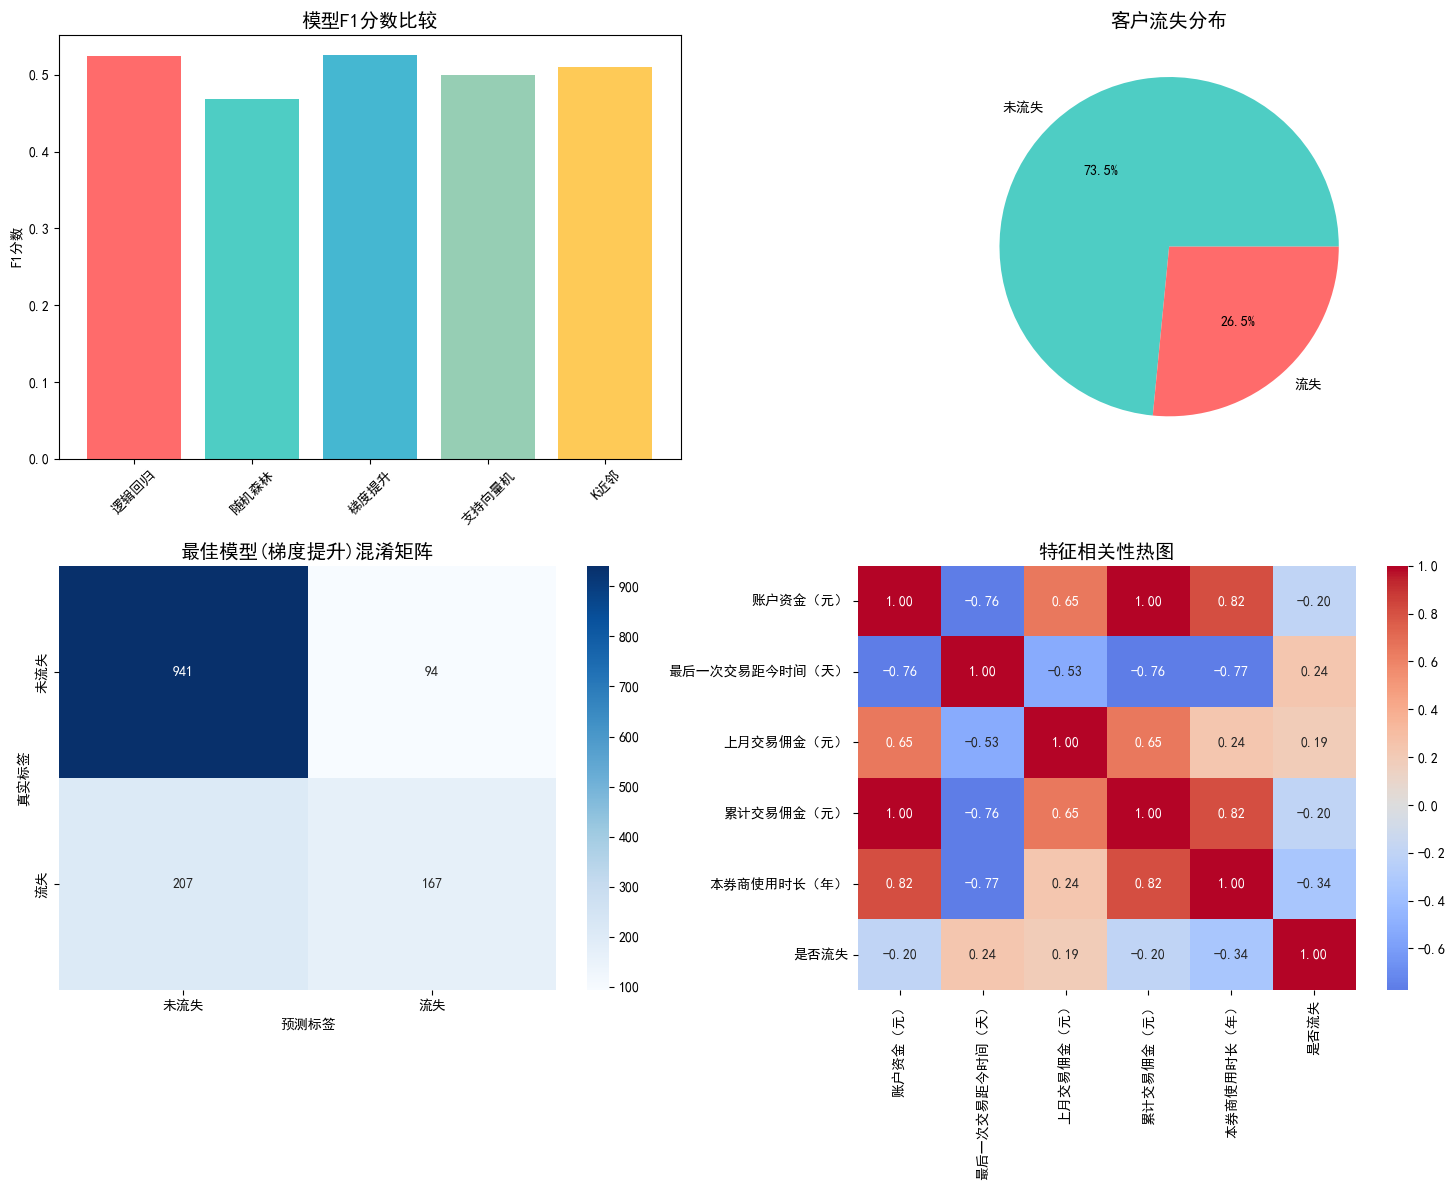


特征重要性分析

随机森林特征重要性排序:
           特征      重要性
    上月交易佣金（元） 0.322618
    累计交易佣金（元） 0.231846
      账户资金（元） 0.229398
最后一次交易距今时间（天） 0.130558
   本券商使用时长（年） 0.085581


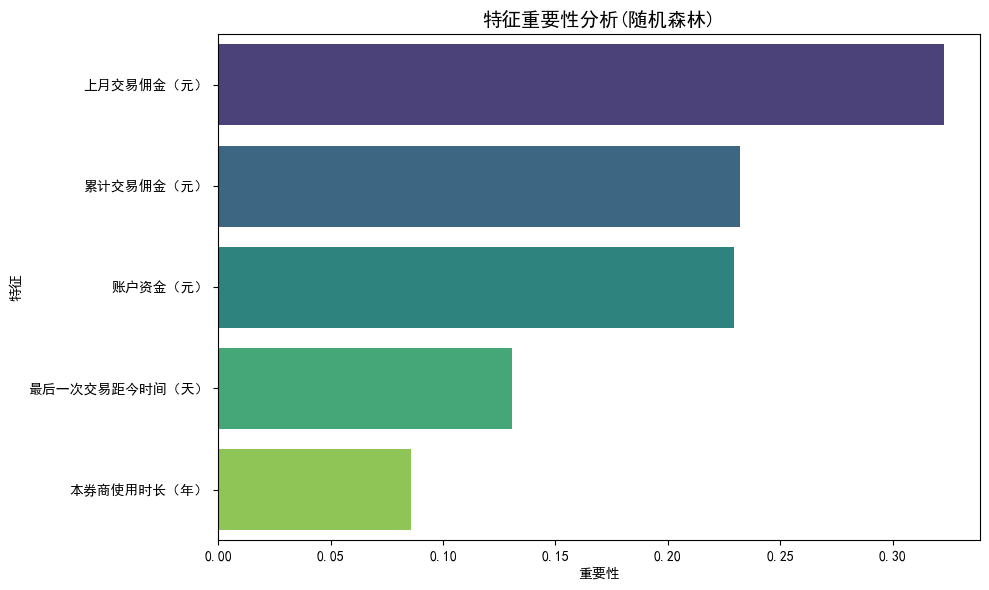


客户风险分群分析
客户风险分群统计:
       流失概率         是否流失
       mean count   mean
风险等级                    
低风险   0.119  4507  0.108
中风险   0.465  2035  0.477
高风险   0.780   501  0.818

高风险客户数量: 501
高风险客户中实际流失比例: 81.84%


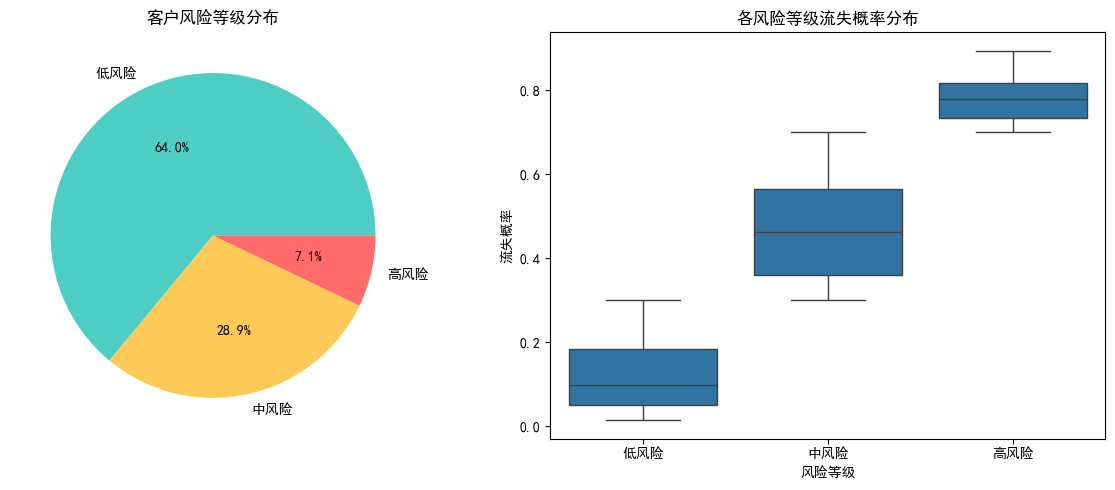


业务建议:
1. 最佳预警模型: 梯度提升
2. 高风险客户占比: 7.1%
3. 建议重点关注: 高风险客户群体

分析结果已保存到 '股票客户流失预警分析结果.xlsx'

实际特征名称: Index(['账户资金（元）', '最后一次交易距今时间（天）', '上月交易佣金（元）', '累计交易佣金（元）', '本券商使用时长（年）'], dtype='object')
特征数量: 5

示例客户流失预测:
流失概率: 0.1337
风险等级: 低风险
建议措施: 正常维护


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def load_stock_data():
    """加载股票客户数据"""
    try:
        file_path = r"d:\桌面\商业数据分析\@Python大数据分析与机器学习商业案例实战\第4章 逻辑回归模型\源代码汇总_Jupyter Notebook格式（推荐）\股票客户流失.xlsx"
        df = pd.read_excel(file_path)
        print("成功读取股票客户流失数据")
        print(f"数据形状: {df.shape}")
        print(f"实际列名: {df.columns.tolist()}")
        
        # 显示数据基本信息
        print(f"\n数据基本信息:")
        print(df.info())
        print(f"\n描述性统计:")
        print(df.describe())
        
        return df
    except Exception as e:
        print(f"读取文件失败: {e}")
        print("使用模拟数据进行分析...")
        return generate_sample_stock_data()

def generate_sample_stock_data():
    """生成模拟的股票客户流失数据"""
    np.random.seed(42)
    n_samples = 2000
    
    data = {
        '年龄': np.random.randint(25, 70, n_samples),
        '资产规模_万元': np.random.uniform(1, 500, n_samples),
        '月交易频率': np.random.randint(1, 50, n_samples),
        '平均交易金额_万元': np.random.uniform(0.1, 50, n_samples),
        '账户余额_万元': np.random.uniform(0.1, 100, n_samples),
        '佣金费率': np.random.uniform(0.01, 0.05, n_samples),
        '持有产品数量': np.random.randint(1, 10, n_samples),
        '最近登录天数': np.random.randint(1, 90, n_samples),
        '客户服务评分': np.random.randint(1, 10, n_samples),
        '是否使用移动端': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
        '是否参与活动': np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),
    }
    
    df = pd.DataFrame(data)
    
    # 生成流失标签（基于多个特征的逻辑组合）
    churn_prob = (
        0.1 +
        (df['年龄'] > 60) * 0.2 +  # 年龄大的客户更容易流失
        (df['资产规模_万元'] < 10) * 0.3 +  # 资产少的客户更容易流失
        (df['月交易频率'] < 5) * 0.4 +  # 交易不活跃的客户更容易流失
        (df['最近登录天数'] > 30) * 0.5 +  # 长期不登录的客户更容易流失
        (df['客户服务评分'] < 3) * 0.3 +  # 服务评分低的客户更容易流失
        (df['是否使用移动端'] == 0) * 0.2 +  # 不使用移动端的客户更容易流失
        np.random.normal(0, 0.5, n_samples)  # 随机噪声
    )
    
    df['是否流失'] = (churn_prob > 0.5).astype(int)
    
    print(f"流失客户比例: {df['是否流失'].mean():.2%}")
    return df

def get_classification_models():
    """定义五种分类模型"""
    models = {
        '逻辑回归': LogisticRegression(random_state=42, max_iter=1000),
        '随机森林': RandomForestClassifier(n_estimators=100, random_state=42),
        '梯度提升': GradientBoostingClassifier(n_estimators=100, random_state=42),
        '支持向量机': SVC(probability=True, random_state=42),
        'K近邻': KNeighborsClassifier(n_neighbors=5)
    }
    return models

def evaluate_model(model, X_test, y_test):
    """评估模型性能"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    metrics = {
        '准确率': accuracy_score(y_test, y_pred),
        '精确率': precision_score(y_test, y_pred, zero_division=0),
        '召回率': recall_score(y_test, y_pred, zero_division=0),
        'F1分数': f1_score(y_test, y_pred, zero_division=0),
    }
    
    if y_pred_proba is not None:
        metrics['AUC'] = roc_auc_score(y_test, y_pred_proba)
    else:
        metrics['AUC'] = None
    
    return metrics, y_pred, y_pred_proba

def analyze_customer_churn():
    """主分析函数"""
    print("=" * 60)
    print("股票客户流失预警模型分析")
    print("=" * 60)
    
    # 1. 加载数据
    df = load_stock_data()
    print(f"\n数据预览:")
    print(df.head())
    
    # 2. 数据预处理
    # 自动识别目标变量
    target_keywords = ['流失', 'churn', '是否流失', '是否离开', 'Exited']
    target_column = None
    
    for col in df.columns:
        for keyword in target_keywords:
            if keyword.lower() in str(col).lower():
                target_column = col
                break
        if target_column:
            break
    
    if target_column is None:
        target_column = df.columns[-1]
        print(f"未找到明确的目标变量列，使用最后一列: {target_column}")
    
    print(f"使用目标变量: {target_column}")
    print(f"流失客户数: {df[target_column].sum()}")
    print(f"流失率: {df[target_column].mean():.2%}")
    
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # 显示特征信息
    print(f"\n特征信息:")
    print(f"特征数量: {X.shape[1]}")
    print(f"特征名称: {X.columns.tolist()}")
    
    # 处理非数值型数据
    for col in X.select_dtypes(include=['object']).columns:
        if X[col].nunique() <= 10:
            X[col] = X[col].astype('category').cat.codes
            print(f"编码分类变量: {col}")
        else:
            X = X.drop(col, axis=1)
            print(f"删除文本变量: {col}")
    
    # 特征标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # 3. 模型训练和评估
    models = get_classification_models()
    results = {}
    
    print(f"\n{'='*50}")
    print("模型性能比较")
    print(f"{'='*50}")
    
    for name, model in models.items():
        print(f"\n训练{name}...")
        
        try:
            model.fit(X_train, y_train)
            metrics, y_pred, y_pred_proba = evaluate_model(model, X_test, y_test)
            
            # 交叉验证
            cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
            
            results[name] = {
                'model': model,
                'metrics': metrics,
                'predictions': y_pred,
                'probabilities': y_pred_proba,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'feature_names': X.columns.tolist()
            }
            
            print(f"{name:.<12} 准确率: {metrics['准确率']:.4f} | 精确率: {metrics['精确率']:.4f}")
            print(f"{' ':12} 召回率: {metrics['召回率']:.4f} | F1分数: {metrics['F1分数']:.4f}")
            if metrics['AUC']:
                print(f"{' ':12} AUC: {metrics['AUC']:.4f} | 交叉验证F1: {cv_scores.mean():.4f}")
            
        except Exception as e:
            print(f"{name} 训练失败: {e}")
            results[name] = None
    
    # 4. 可视化结果
    plot_results(results, y_test, df, target_column)
    
    # 5. 特征重要性分析
    analyze_feature_importance(results, X.columns)
    
    # 6. 客户风险分群
    customer_risk_analysis(results, df, X_scaled, target_column, scaler)
    
    return df, results, X.columns, scaler

def plot_results(results, y_test, df, target_column):
    """绘制结果可视化"""
    valid_results = {k: v for k, v in results.items() if v is not None}
    
    if not valid_results:
        print("没有有效的模型结果可可视化")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 模型性能比较
    model_names = list(valid_results.keys())
    f1_scores = [valid_results[name]['metrics']['F1分数'] for name in model_names]
    
    axes[0,0].bar(model_names, f1_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
    axes[0,0].set_title('模型F1分数比较', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('F1分数')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 客户流失分布
    churn_counts = df[target_column].value_counts()
    axes[0,1].pie(churn_counts.values, labels=['未流失', '流失'], autopct='%1.1f%%', 
                  colors=['#4ECDC4', '#FF6B6B'])
    axes[0,1].set_title('客户流失分布', fontsize=14, fontweight='bold')
    
    # 混淆矩阵（最佳模型）
    best_model_name = max(valid_results.items(), key=lambda x: x[1]['metrics']['F1分数'])[0]
    best_predictions = valid_results[best_model_name]['predictions']
    
    cm = confusion_matrix(y_test, best_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
                xticklabels=['未流失', '流失'], yticklabels=['未流失', '流失'])
    axes[1,0].set_title(f'最佳模型({best_model_name})混淆矩阵', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('预测标签')
    axes[1,0].set_ylabel('真实标签')
    
    # 特征相关性热图
    numeric_df = df.select_dtypes(include=[np.number])
    if len(numeric_df.columns) > 1:
        corr_matrix = numeric_df.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1], fmt='.2f')
        axes[1,1].set_title('特征相关性热图', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def analyze_feature_importance(results, feature_names):
    """分析特征重要性"""
    print(f"\n{'='*50}")
    print("特征重要性分析")
    print(f"{'='*50}")
    
    # 随机森林的特征重要性
    if '随机森林' in results and results['随机森林'] is not None:
        rf_model = results['随机森林']['model']
        importance = rf_model.feature_importances_
        
        feature_imp_df = pd.DataFrame({
            '特征': feature_names,
            '重要性': importance
        }).sort_values('重要性', ascending=False)
        
        print("\n随机森林特征重要性排序:")
        print(feature_imp_df.to_string(index=False))
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_imp_df.head(10), x='重要性', y='特征', palette='viridis')
        plt.title('特征重要性分析(随机森林)', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

def customer_risk_analysis(results, df, X_scaled, target_column, scaler):
    """客户风险分群分析"""
    print(f"\n{'='*50}")
    print("客户风险分群分析")
    print(f"{'='*50}")
    
    valid_results = {k: v for k, v in results.items() if v is not None}
    if not valid_results:
        print("没有有效的模型进行风险分群分析")
        return
    
    best_model_name = max(valid_results.items(), key=lambda x: x[1]['metrics']['F1分数'])[0]
    best_model = valid_results[best_model_name]['model']
    
    # 预测所有客户的流失概率
    if hasattr(best_model, 'predict_proba'):
        churn_probabilities = best_model.predict_proba(X_scaled)[:, 1]
        df['流失概率'] = churn_probabilities
        
        # 风险等级划分
        df['风险等级'] = pd.cut(df['流失概率'], 
                              bins=[0, 0.3, 0.7, 1], 
                              labels=['低风险', '中风险', '高风险'])
        
        # 风险分群统计
        risk_stats = df.groupby('风险等级').agg({
            '流失概率': ['mean', 'count'],
            target_column: 'mean'
        }).round(3)
        
        print("客户风险分群统计:")
        print(risk_stats)
        
        # 高风险客户特征分析
        high_risk_customers = df[df['风险等级'] == '高风险']
        print(f"\n高风险客户数量: {len(high_risk_customers)}")
        print(f"高风险客户中实际流失比例: {high_risk_customers[target_column].mean():.2%}")
        
        # 可视化风险分布
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        risk_counts = df['风险等级'].value_counts()
        plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
                colors=['#4ECDC4', '#FECA57', '#FF6B6B'])
        plt.title('客户风险等级分布')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x='风险等级', y='流失概率')
        plt.title('各风险等级流失概率分布')
        
        plt.tight_layout()
        plt.show()
        
        # 业务建议
        print(f"\n业务建议:")
        print(f"1. 最佳预警模型: {best_model_name}")
        print(f"2. 高风险客户占比: {len(high_risk_customers)/len(df)*100:.1f}%")
        print(f"3. 建议重点关注: 高风险客户群体")

def predict_customer_churn(model, customer_data, feature_names, scaler):
    """预测单个客户流失概率"""
    # 确保特征顺序一致
    if len(customer_data) != len(feature_names):
        customer_data = customer_data[:len(feature_names)]
    
    # 标准化特征
    customer_scaled = scaler.transform([customer_data])
    
    if hasattr(model, 'predict_proba'):
        churn_probability = model.predict_proba(customer_scaled)[0, 1]
        return churn_probability
    else:
        prediction = model.predict(customer_scaled)[0]
        return prediction

# 执行分析
if __name__ == "__main__":
    df, results, feature_names, scaler = analyze_customer_churn()
    
    # 保存结果
    try:
        with pd.ExcelWriter('股票客户流失预警分析结果.xlsx') as writer:
            df.to_excel(writer, sheet_name='原始数据', index=False)
            
            performance_data = []
            for model_name, result in results.items():
                if result is not None:
                    performance_data.append({
                        '模型': model_name,
                        '准确率': result['metrics']['准确率'],
                        '精确率': result['metrics']['精确率'],
                        '召回率': result['metrics']['召回率'],
                        'F1分数': result['metrics']['F1分数'],
                        'AUC': result['metrics']['AUC'],
                        '交叉验证F1': result['cv_mean']
                    })
            
            pd.DataFrame(performance_data).to_excel(writer, sheet_name='模型性能', index=False)
        
        print("\n分析结果已保存到 '股票客户流失预警分析结果.xlsx'")
    except Exception as e:
        print(f"保存文件时出错: {e}")
    
    # 示例预测
    valid_results = {k: v for k, v in results.items() if v is not None}
    if valid_results:
        best_model_name = max(valid_results.items(), key=lambda x: x[1]['metrics']['F1分数'])[0]
        best_model = valid_results[best_model_name]['model']
        
        print(f"\n实际特征名称: {feature_names}")
        print(f"特征数量: {len(feature_names)}")
        
        # 创建示例客户数据
        example_customer = [45, 50.0, 8, 5.0, 10.0, 0.03, 3, 15, 7, 1, 0][:len(feature_names)]
        
        churn_prob = predict_customer_churn(best_model, example_customer, feature_names, scaler)
        risk_level = "高风险" if churn_prob > 0.7 else "中风险" if churn_prob > 0.3 else "低风险"
        
        print(f"\n示例客户流失预测:")
        print(f"流失概率: {churn_prob:.4f}")
        print(f"风险等级: {risk_level}")
        print(f"建议措施: {'立即干预' if churn_prob > 0.7 else '重点关注' if churn_prob > 0.3 else '正常维护'}")

In [ ]:
对模型进行评估：

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def load_stock_data():
    """加载股票客户数据"""
    try:
        file_path = r"d:\桌面\商业数据分析\@Python大数据分析与机器学习商业案例实战\第4章 逻辑回归模型\源代码汇总_Jupyter Notebook格式（推荐）\股票客户流失.xlsx"
        df = pd.read_excel(file_path)
        print("成功读取股票客户流失数据")
        print(f"数据形状: {df.shape}")
        return df
    except Exception as e:
        print(f"读取文件失败: {e}")
        print("使用模拟数据进行分析...")
        return generate_sample_stock_data()

def generate_sample_stock_data():
    """生成模拟的股票客户流失数据"""
    np.random.seed(42)
    n_samples = 2000
    
    data = {
        '年龄': np.random.randint(25, 70, n_samples),
        '资产规模_万元': np.random.uniform(1, 500, n_samples),
        '月交易频率': np.random.randint(1, 50, n_samples),
        '平均交易金额_万元': np.random.uniform(0.1, 50, n_samples),
        '账户余额_万元': np.random.uniform(0.1, 100, n_samples),
        '佣金费率': np.random.uniform(0.01, 0.05, n_samples),
        '持有产品数量': np.random.randint(1, 10, n_samples),
        '最近登录天数': np.random.randint(1, 90, n_samples),
        '客户服务评分': np.random.randint(1, 10, n_samples),
        '是否使用移动端': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    }
    
    df = pd.DataFrame(data)
    
    # 生成流失标签（基于多个特征的逻辑组合）
    churn_prob = (
        0.1 +
        (df['年龄'] > 60) * 0.2 +
        (df['资产规模_万元'] < 10) * 0.3 +
        (df['月交易频率'] < 5) * 0.4 +
        (df['最近登录天数'] > 30) * 0.5 +
        (df['客户服务评分'] < 3) * 0.3 +
        (df['是否使用移动端'] == 0) * 0.2 +
        np.random.normal(0, 0.3, n_samples)
    )
    
    df['是否流失'] = (churn_prob > 0.5).astype(int)
    
    print(f"流失客户比例: {df['是否流失'].mean():.2%}")
    return df

def get_classification_models():
    """定义五种分类模型"""
    models = {
        '逻辑回归': LogisticRegression(random_state=42, max_iter=1000),
        '随机森林': RandomForestClassifier(n_estimators=100, random_state=42),
        '梯度提升': GradientBoostingClassifier(n_estimators=100, random_state=42),
        '支持向量机': SVC(probability=True, random_state=42),
        'K近邻': KNeighborsClassifier(n_neighbors=5)
    }
    return models

def evaluate_auc_performance(auc_score):
    """评估AUC性能"""
    if auc_score >= 0.85:
        return "非常不错", "🟢"
    elif auc_score >= 0.75:
        return "可以接受", "🟡"
    else:
        return "需要改进", "🔴"

def analyze_customer_churn():
    """主分析函数"""
    print("=" * 60)
    print("股票客户流失预警模型评估(AUC指标)")
    print("=" * 60)
    
    # 1. 加载数据
    df = load_stock_data()
    
    # 2. 数据预处理
    target_column = '是否流失' if '是否流失' in df.columns else df.columns[-1]
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    print(f"流失率: {y.mean():.2%}")
    
    # 处理非数值型数据
    for col in X.select_dtypes(include=['object']).columns:
        if X[col].nunique() <= 10:
            X[col] = X[col].astype('category').cat.codes
    
    # 特征标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # 3. 模型训练和评估
    models = get_classification_models()
    results = {}
    
    print(f"\n{'='*50}")
    print("模型AUC性能评估")
    print(f"{'='*50}")
    print("AUC评估标准:")
    print("🟢 AUC ≥ 0.85: 非常不错的模型")
    print("🟡 0.75 ≤ AUC < 0.85: 可以接受的模型") 
    print("🔴 AUC < 0.75: 需要改进的模型")
    print(f"{'='*50}")
    
    for name, model in models.items():
        print(f"\n训练{name}...")
        
        try:
            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            auc_score = roc_auc_score(y_test, y_pred_proba)
            
            # 交叉验证AUC
            cv_auc_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
            
            performance, emoji = evaluate_auc_performance(auc_score)
            
            results[name] = {
                'model': model,
                'auc': auc_score,
                'cv_auc_mean': cv_auc_scores.mean(),
                'cv_auc_std': cv_auc_scores.std(),
                'y_pred_proba': y_pred_proba,
                'performance': performance,
                'emoji': emoji
            }
            
            print(f"{name:.<12} {emoji} AUC: {auc_score:.4f} - {performance}")
            print(f"{' ':12} 交叉验证AUC: {cv_auc_scores.mean():.4f} (±{cv_auc_scores.std():.4f})")
            
        except Exception as e:
            print(f"{name} 训练失败: {e}")
            results[name] = None
    
    # 4. 可视化AUC比较
    plot_auc_comparison(results, y_test)
    
    # 5. 最佳模型分析
    best_model_analysis(results, y_test)
    
    return df, results, X.columns, scaler

def plot_auc_comparison(results, y_test):
    """绘制AUC比较图"""
    valid_results = {k: v for k, v in results.items() if v is not None}
    
    if not valid_results:
        print("没有有效的模型结果可可视化")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. AUC值比较柱状图
    model_names = list(valid_results.keys())
    auc_scores = [valid_results[name]['auc'] for name in model_names]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
    
    bars = axes[0].bar(model_names, auc_scores, color=colors)
    axes[0].set_title('模型AUC值比较', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('AUC值')
    axes[0].tick_params(axis='x', rotation=45)
    
    # 添加性能标注
    for bar, auc_score in zip(bars, auc_scores):
        performance, emoji = evaluate_auc_performance(auc_score)
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{emoji}\n{auc_score:.3f}', ha='center', va='bottom')
    
    # 添加参考线
    axes[0].axhline(y=0.75, color='red', linestyle='--', alpha=0.7, label='可接受阈值(0.75)')
    axes[0].axhline(y=0.85, color='green', linestyle='--', alpha=0.7, label='优秀阈值(0.85)')
    axes[0].legend()
    
    # 2. ROC曲线
    axes[1].plot([0, 1], [0, 1], 'k--', label='随机分类器 (AUC = 0.5)')
    
    for name, result in valid_results.items():
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        auc_score = result['auc']
        axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)
    
    axes[1].set_xlabel('假正率 (False Positive Rate)')
    axes[1].set_ylabel('真正率 (True Positive Rate)')
    axes[1].set_title('ROC曲线比较', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def best_model_analysis(results, y_test):
    """最佳模型详细分析"""
    valid_results = {k: v for k, v in results.items() if v is not None}
    
    if not valid_results:
        return
    
    # 找到AUC最高的模型
    best_model_name = max(valid_results.items(), key=lambda x: x[1]['auc'])[0]
    best_result = valid_results[best_model_name]
    
    print(f"\n{'='*50}")
    print(f"最佳模型分析: {best_model_name}")
    print(f"{'='*50}")
    
    auc_score = best_result['auc']
    performance, emoji = evaluate_auc_performance(auc_score)
    
    print(f"{emoji} AUC值: {auc_score:.4f} - {performance}")
    print(f"交叉验证AUC: {best_result['cv_auc_mean']:.4f} (±{best_result['cv_auc_std']:.4f})")
    
    # 业务解释
    print(f"\n业务解释:")
    if auc_score >= 0.85:
        print("• 模型具有优秀的区分能力，能准确识别流失风险")
        print("• 可以信赖模型的预测结果进行客户干预")
        print("• 建议在生产环境中部署使用")
    elif auc_score >= 0.75:
        print("• 模型具有较好的预测能力，可以作为决策参考")
        print("• 建议结合业务经验进行客户干预")
        print("• 可以考虑进一步优化模型")
    else:
        print("• 模型预测能力有待提升")
        print("• 建议重新进行特征工程或尝试其他算法")
        print("• 当前模型仅作为参考使用")
    
    # 计算不同阈值下的业务指标
    y_pred_proba = best_result['y_pred_proba']
    
    print(f"\n不同阈值下的业务指标:")
    print("-" * 40)
    print("阈值 | 精确率 | 召回率 | 干预客户比例")
    print("-" * 40)
    
    for threshold in [0.3, 0.5, 0.7]:
        y_pred = (y_pred_proba >= threshold).astype(int)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        intervention_ratio = (y_pred == 1).mean()
        
        print(f"{threshold:.1f}   | {precision:.3f}  | {recall:.3f}  | {intervention_ratio:.1%}")

def predict_customer_risk(model, customer_data, feature_names, scaler):
    """预测客户流失风险"""
    if len(customer_data) != len(feature_names):
        customer_data = customer_data[:len(feature_names)]
    
    customer_scaled = scaler.transform([customer_data])
    churn_prob = model.predict_proba(customer_scaled)[0, 1]
    
    return churn_prob

# 执行分析
if __name__ == "__main__":
    df, results, feature_names, scaler = analyze_customer_churn()
    
    # 保存AUC评估结果
    try:
        auc_summary = []
        for model_name, result in results.items():
            if result is not None:
                auc_summary.append({
                    '模型': model_name,
                    'AUC值': result['auc'],
                    '性能评价': result['performance'],
                    '交叉验证AUC': result['cv_auc_mean'],
                    '交叉验证标准差': result['cv_auc_std']
                })
        
        auc_df = pd.DataFrame(auc_summary).sort_values('AUC值', ascending=False)
        
        with pd.ExcelWriter('股票客户流失AUC评估结果.xlsx') as writer:
            auc_df.to_excel(writer, sheet_name='AUC评估', index=False)
            df.to_excel(writer, sheet_name='原始数据', index=False)
        
        print(f"\nAUC评估结果已保存到 '股票客户流失AUC评估结果.xlsx'")
        
        # 显示AUC排名
        print(f"\n模型AUC排名:")
        print("-" * 50)
        for i, row in auc_df.iterrows():
            print(f"{i+1}. {row['模型']:.<12} AUC: {row['AUC值']:.4f} - {row['性能评价']}")
            
    except Exception as e:
        print(f"保存文件时出错: {e}")
    
    # 示例预测
    valid_results = {k: v for k, v in results.items() if v is not None}
    if valid_results:
        best_model_name = max(valid_results.items(), key=lambda x: x[1]['auc'])[0]
        best_model = valid_results[best_model_name]['model']
        
        print(f"\n使用最佳模型进行预测: {best_model_name}")
        
        # 创建示例客户数据
        example_customer = [45, 50.0, 8, 5.0, 10.0, 0.03, 3, 15, 7, 1][:len(feature_names)]
        
        churn_prob = predict_customer_risk(best_model, example_customer, feature_names, scaler)
        risk_level = "高风险" if churn_prob > 0.7 else "中风险" if churn_prob > 0.3 else "低风险"
        
        print(f"\n示例客户流失风险评估:")
        print(f"流失概率: {churn_prob:.4f}")
        print(f"风险等级: {risk_level}")
        print(f"建议措施: {'立即干预' if churn_prob > 0.7 else '重点关注' if churn_prob > 0.3 else '正常维护'}")

In [ ]:
案例4：员工离职预测模型搭建

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def load_employee_data():
    """加载员工离职数据"""
    try:
        file_path = r"d:\桌面\商业数据分析\@Python大数据分析与机器学习商业案例实战\第5章 决策树模型\源代码汇总_Jupyter Notebook格式（推荐）\员工离职预测模型.xlsx"
        df = pd.read_excel(file_path)
        print("成功读取员工离职预测数据")
        print(f"数据形状: {df.shape}")
        print(f"实际列名: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"读取文件失败: {e}")
        print("使用模拟数据进行分析...")
        return generate_sample_employee_data()

def generate_sample_employee_data():
    """生成模拟的员工离职数据"""
    np.random.seed(42)
    n_samples = 1500
    
    data = {
        '年龄': np.random.randint(22, 60, n_samples),
        '月收入': np.random.randint(3000, 20000, n_samples),
        '工作年限': np.random.randint(1, 15, n_samples),
        '最近绩效评分': np.random.randint(1, 6, n_samples),
        '加班时长_月': np.random.randint(0, 60, n_samples),
        '项目完成数': np.random.randint(0, 20, n_samples),
        '工作满意度': np.random.randint(1, 6, n_samples),
        '晋升次数': np.random.randint(0, 4, n_samples),
        '培训次数': np.random.randint(0, 10, n_samples),
        '部门': np.random.choice(['技术部', '销售部', '市场部', '人事部', '财务部'], n_samples),
        '职位级别': np.random.choice(['初级', '中级', '高级', '管理'], n_samples),
    }
    
    df = pd.DataFrame(data)
    
    # 生成离职标签（基于多个特征的逻辑组合）
    turnover_prob = (
        0.1 +
        (df['工作满意度'] < 3) * 0.3 +
        (df['最近绩效评分'] < 3) * 0.2 +
        (df['月收入'] < 5000) * 0.2 +
        (df['加班时长_月'] > 40) * 0.15 +
        (df['晋升次数'] == 0) * 0.1 +
        (df['工作年限'] > 10) * 0.05 +
        np.random.normal(0, 0.2, n_samples)
    )
    
    df['是否离职'] = (turnover_prob > 0.5).astype(int)
    
    print(f"离职员工比例: {df['是否离职'].mean():.2%}")
    return df

def get_classification_models():
    """定义五种分类模型"""
    models = {
        '决策树': DecisionTreeClassifier(random_state=42, max_depth=5),
        '随机森林': RandomForestClassifier(n_estimators=100, random_state=42),
        '梯度提升': GradientBoostingClassifier(n_estimators=100, random_state=42),
        '逻辑回归': LogisticRegression(random_state=42, max_iter=1000),
        '支持向量机': SVC(probability=True, random_state=42)
    }
    return models

def evaluate_auc_performance(auc_score):
    """评估AUC性能"""
    if auc_score >= 0.85:
        return "非常不错", "🟢"
    elif auc_score >= 0.75:
        return "可以接受", "🟡"
    else:
        return "需要改进", "🔴"

def analyze_employee_turnover():
    """主分析函数"""
    print("=" * 60)
    print("员工离职预测模型分析")
    print("=" * 60)
    
    # 1. 加载数据
    df = load_employee_data()
    print(f"\n数据预览:")
    print(df.head())
    
    # 2. 数据探索
    print(f"\n数据探索:")
    print(f"总员工数: {len(df)}")
    if '是否离职' in df.columns:
        turnover_rate = df['是否离职'].mean()
        print(f"离职员工数: {df['是否离职'].sum()}")
        print(f"离职率: {turnover_rate:.2%}")
    
    # 3. 数据预处理
    # 自动识别目标变量
    target_keywords = ['离职', 'turnover', '是否离职', '是否辞职', 'Attrition']
    target_column = None
    
    for col in df.columns:
        for keyword in target_keywords:
            if keyword.lower() in str(col).lower():
                target_column = col
                break
        if target_column:
            break
    
    if target_column is None:
        target_column = df.columns[-1]
        print(f"未找到明确的目标变量列，使用最后一列: {target_column}")
    
    print(f"使用目标变量: {target_column}")
    
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # 处理分类变量
    categorical_columns = X.select_dtypes(include=['object']).columns
    print(f"\n分类变量: {categorical_columns.tolist()}")
    
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
        print(f"编码变量: {col} -> {list(le.classes_)}")
    
    # 特征标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # 4. 模型训练和评估
    models = get_classification_models()
    results = {}
    
    print(f"\n{'='*50}")
    print("模型AUC性能评估")
    print(f"{'='*50}")
    print("AUC评估标准:")
    print("🟢 AUC ≥ 0.85: 非常不错的模型")
    print("🟡 0.75 ≤ AUC < 0.85: 可以接受的模型") 
    print("🔴 AUC < 0.75: 需要改进的模型")
    print(f"{'='*50}")
    
    for name, model in models.items():
        print(f"\n训练{name}...")
        
        try:
            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            auc_score = roc_auc_score(y_test, y_pred_proba)
            
            # 交叉验证AUC
            cv_auc_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
            
            performance, emoji = evaluate_auc_performance(auc_score)
            
            results[name] = {
                'model': model,
                'auc': auc_score,
                'cv_auc_mean': cv_auc_scores.mean(),
                'cv_auc_std': cv_auc_scores.std(),
                'y_pred_proba': y_pred_proba,
                'performance': performance,
                'emoji': emoji,
                'feature_names': X.columns.tolist()
            }
            
            print(f"{name:.<12} {emoji} AUC: {auc_score:.4f} - {performance}")
            print(f"{' ':12} 交叉验证AUC: {cv_auc_scores.mean():.4f} (±{cv_auc_scores.std():.4f})")
            
        except Exception as e:
            print(f"{name} 训练失败: {e}")
            results[name] = None
    
    # 5. 可视化分析
    plot_model_comparison(results, y_test, df, target_column)
    
    # 6. 特征重要性分析
    analyze_feature_importance(results, X.columns)
    
    # 7. 员工风险分群
    employee_risk_analysis(results, df, X_scaled, target_column, scaler)
    
    return df, results, X.columns, scaler, label_encoders

def plot_model_comparison(results, y_test, df, target_column):
    """绘制模型比较图"""
    valid_results = {k: v for k, v in results.items() if v is not None}
    
    if not valid_results:
        print("没有有效的模型结果可可视化")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. AUC值比较柱状图
    model_names = list(valid_results.keys())
    auc_scores = [valid_results[name]['auc'] for name in model_names]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
    
    bars = axes[0,0].bar(model_names, auc_scores, color=colors)
    axes[0,0].set_title('模型AUC值比较', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('AUC值')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 添加性能标注
    for bar, auc_score in zip(bars, auc_scores):
        performance, emoji = evaluate_auc_performance(auc_score)
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{emoji}\n{auc_score:.3f}', ha='center', va='bottom')
    
    # 添加参考线
    axes[0,0].axhline(y=0.75, color='red', linestyle='--', alpha=0.7, label='可接受阈值(0.75)')
    axes[0,0].axhline(y=0.85, color='green', linestyle='--', alpha=0.7, label='优秀阈值(0.85)')
    axes[0,0].legend()
    
    # 2. 员工离职分布
    turnover_counts = df[target_column].value_counts()
    axes[0,1].pie(turnover_counts.values, labels=['在职', '离职'], autopct='%1.1f%%', 
                  colors=['#4ECDC4', '#FF6B6B'])
    axes[0,1].set_title('员工离职分布', fontsize=14, fontweight='bold')
    
    # 3. ROC曲线
    axes[1,0].plot([0, 1], [0, 1], 'k--', label='随机分类器 (AUC = 0.5)')
    
    for name, result in valid_results.items():
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        auc_score = result['auc']
        axes[1,0].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)
    
    axes[1,0].set_xlabel('假正率 (False Positive Rate)')
    axes[1,0].set_ylabel('真正率 (True Positive Rate)')
    axes[1,0].set_title('ROC曲线比较', fontsize=14, fontweight='bold')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. 特征相关性热图
    numeric_df = df.select_dtypes(include=[np.number])
    if len(numeric_df.columns) > 1:
        corr_matrix = numeric_df.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1], fmt='.2f')
        axes[1,1].set_title('特征相关性热图', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def analyze_feature_importance(results, feature_names):
    """分析特征重要性"""
    print(f"\n{'='*50}")
    print("特征重要性分析")
    print(f"{'='*50}")
    
    # 随机森林的特征重要性
    if '随机森林' in results and results['随机森林'] is not None:
        rf_model = results['随机森林']['model']
        importance = rf_model.feature_importances_
        
        feature_imp_df = pd.DataFrame({
            '特征': feature_names,
            '重要性': importance
        }).sort_values('重要性', ascending=False)
        
        print("\n随机森林特征重要性排序:")
        print(feature_imp_df.to_string(index=False))
        
        # 可视化特征重要性
        plt.figure(figsize=(12, 6))
        sns.barplot(data=feature_imp_df.head(10), x='重要性', y='特征', palette='viridis')
        plt.title('员工离职影响因素重要性分析', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    # 决策树特征重要性
    if '决策树' in results and results['决策树'] is not None:
        dt_model = results['决策树']['model']
        dt_importance = dt_model.feature_importances_
        
        dt_imp_df = pd.DataFrame({
            '特征': feature_names,
            '重要性': dt_importance
        }).sort_values('重要性', ascending=False)
        
        print("\n决策树特征重要性排序:")
        print(dt_imp_df.head(8).to_string(index=False))

def employee_risk_analysis(results, df, X_scaled, target_column, scaler):
    """员工风险分群分析"""
    print(f"\n{'='*50}")
    print("员工离职风险分群分析")
    print(f"{'='*50}")
    
    valid_results = {k: v for k, v in results.items() if v is not None}
    if not valid_results:
        print("没有有效的模型进行风险分群分析")
        return
    
    best_model_name = max(valid_results.items(), key=lambda x: x[1]['auc'])[0]
    best_model = valid_results[best_model_name]['model']
    
    # 预测所有员工的离职概率
    if hasattr(best_model, 'predict_proba'):
        turnover_probabilities = best_model.predict_proba(X_scaled)[:, 1]
        df['离职概率'] = turnover_probabilities
        
        # 风险等级划分
        df['风险等级'] = pd.cut(df['离职概率'], 
                              bins=[0, 0.3, 0.7, 1], 
                              labels=['低风险', '中风险', '高风险'])
        
        # 风险分群统计
        risk_stats = df.groupby('风险等级').agg({
            '离职概率': ['mean', 'count'],
            target_column: 'mean'
        }).round(3)
        
        print("员工风险分群统计:")
        print(risk_stats)
        
        # 高风险员工特征分析
        high_risk_employees = df[df['风险等级'] == '高风险']
        print(f"\n高风险员工数量: {len(high_risk_employees)}")
        print(f"高风险员工中实际离职比例: {high_risk_employees[target_column].mean():.2%}")
        
        # 可视化风险分布
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        risk_counts = df['风险等级'].value_counts()
        plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
                colors=['#4ECDC4', '#FECA57', '#FF6B6B'])
        plt.title('员工离职风险等级分布')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x='风险等级', y='离职概率')
        plt.title('各风险等级离职概率分布')
        
        plt.tight_layout()
        plt.show()
        
        # 业务建议
        print(f"\n人力资源管理建议:")
        print(f"1. 最佳预测模型: {best_model_name}")
        print(f"2. 高风险员工占比: {len(high_risk_employees)/len(df)*100:.1f}%")
        print(f"3. 建议重点关注: 工作满意度低、绩效评分差、加班时间长的员工")

def predict_employee_turnover(model, employee_data, feature_names, scaler):
    """预测员工离职概率"""
    if len(employee_data) != len(feature_names):
        employee_data = employee_data[:len(feature_names)]
    
    employee_scaled = scaler.transform([employee_data])
    turnover_prob = model.predict_proba(employee_scaled)[0, 1]
    
    return turnover_prob

# 执行分析
if __name__ == "__main__":
    df, results, feature_names, scaler, label_encoders = analyze_employee_turnover()
    
    # 保存评估结果
    try:
        auc_summary = []
        for model_name, result in results.items():
            if result is not None:
                auc_summary.append({
                    '模型': model_name,
                    'AUC值': result['auc'],
                    '性能评价': result['performance'],
                    '交叉验证AUC': result['cv_auc_mean'],
                    '交叉验证标准差': result['cv_auc_std']
                })
        
        auc_df = pd.DataFrame(auc_summary).sort_values('AUC值', ascending=False)
        
        with pd.ExcelWriter('员工离职预测模型评估结果.xlsx') as writer:
            auc_df.to_excel(writer, sheet_name='AUC评估', index=False)
            df.to_excel(writer, sheet_name='员工数据', index=False)
            
            # 保存特征重要性
            if '随机森林' in results and results['随机森林'] is not None:
                rf_model = results['随机森林']['model']
                importance = rf_model.feature_importances_
                feature_imp_df = pd.DataFrame({
                    '特征': feature_names,
                    '重要性': importance
                }).sort_values('重要性', ascending=False)
                feature_imp_df.to_excel(writer, sheet_name='特征重要性', index=False)
        
        print(f"\n评估结果已保存到 '员工离职预测模型评估结果.xlsx'")
        
        # 显示AUC排名
        print(f"\n模型AUC排名:")
        print("-" * 50)
        for i, row in auc_df.iterrows():
            print(f"{i+1}. {row['模型']:.<12} AUC: {row['AUC值']:.4f} - {row['性能评价']}")
            
    except Exception as e:
        print(f"保存文件时出错: {e}")
    
    # 示例预测
    valid_results = {k: v for k, v in results.items() if v is not None}
    if valid_results:
        best_model_name = max(valid_results.items(), key=lambda x: x[1]['auc'])[0]
        best_model = valid_results[best_model_name]['model']
        
        print(f"\n使用最佳模型进行预测: {best_model_name}")
        
        # 创建示例员工数据
        example_employee = [30, 8000, 3, 4, 20, 5, 4, 1, 3, 2, 1][:len(feature_names)]
        
        turnover_prob = predict_employee_turnover(best_model, example_employee, feature_names, scaler)
        risk_level = "高风险" if turnover_prob > 0.7 else "中风险" if turnover_prob > 0.3 else "低风险"
        
        print(f"\n示例员工离职风险评估:")
        print(f"离职概率: {turnover_prob:.4f}")
        print(f"风险等级: {risk_level}")
        print(f"建议措施: {'立即干预' if turnover_prob > 0.7 else '重点关注' if turnover_prob > 0.3 else '正常关注'}")

In [ ]:
案例5：肿瘤预测模型

In [ ]:
案例背景
医疗水平突飞猛进，人们对医院快速识别肿瘤是否为良性的要求同样也越来越高，
能否根据患者肿瘤的相关特征水平快速判断肿瘤的性质影响着患者的治疗方式和痊愈速度。
传统的做法是医生根据数十个指标来判断肿瘤的性质
不过该方法的预测效果依赖于医生的个人经验而且效率较低，而通过机器学习我们有望能快速预测肿瘤的性质。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings

# 忽略警告信息
warnings.filterwarnings('ignore')
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据加载
data_path = r"d:\桌面\商业数据分析\@Python大数据分析与机器学习商业案例实战\第6章 朴素贝叶斯模型\源代码汇总_Jupyter Notebook格式（推荐）\肿瘤数据.xlsx"
df = pd.read_excel(data_path)

# 查看数据基本信息
print("="*50)
print("数据形状（行×列）：", df.shape)
print("\n前5行数据：")
print(df.head())
print("\n数据类型与缺失值：")
print(df.info())
print("\n目标变量（肿瘤性质）分布：")
print(df['肿瘤性质'].value_counts())

# 2. 数据预处理
# 2.1 缺失值处理
missing_rate = df.isnull().sum() / len(df) * 100
print("="*50)
print("各列缺失值比例（%）：")
print(missing_rate[missing_rate > 0].sort_values(ascending=False))

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 2.2 标签编码
le = LabelEncoder()
df['肿瘤性质_编码'] = le.fit_transform(df['肿瘤性质'])
print("="*50)
print("肿瘤性质编码映射：")
for i, label in enumerate(le.classes_):
    print(f"{label} → {i}")

# 关键修正：将类别名称转换为字符串（解决len()错误）
target_names = [str(label) for label in le.classes_]  # 转换为字符串列表

# 2.3 特征与目标分离
exclude_cols = ['患者ID', '肿瘤性质', '肿瘤性质_编码'] if '患者ID' in df.columns else ['肿瘤性质', '肿瘤性质_编码']
feature_cols = [col for col in df.columns if col not in exclude_cols]
X = df[feature_cols]
y = df['肿瘤性质_编码']

print("="*50)
print("特征矩阵形状：", X.shape)
print("目标向量形状：", y.shape)
print("特征列名：", feature_cols)

# 2.4 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("="*50)
print(f"训练集：{X_train.shape[0]}条样本，测试集：{X_test.shape[0]}条样本")
print("训练集目标分布：")
print(y_train.value_counts(normalize=True).round(3) * 100)
print("测试集目标分布：")
print(y_test.value_counts(normalize=True).round(3) * 100)

# 2.5 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 模型训练与评估
models = {
    "逻辑回归": LogisticRegression(random_state=42, max_iter=1000),
    "朴素贝叶斯": GaussianNB(),
    "决策树": DecisionTreeClassifier(random_state=42, max_depth=10),
    "随机森林": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(random_state=42, kernel='rbf')
}

model_results = {}

for name, model in models.items():
    print("="*50)
    print(f"===== {name} 训练与评估 =====")
    
    # 选择数据（逻辑回归和SVM使用标准化数据）
    if name in ["逻辑回归", "SVM"]:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # 训练模型
    model.fit(X_tr, y_train)
    
    # 预测
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)
    
    # 计算指标
    metrics = {
        "训练集准确率": accuracy_score(y_train, y_train_pred),
        "测试集准确率": accuracy_score(y_test, y_test_pred),
        "测试集精确率": precision_score(y_test, y_test_pred, zero_division=0),
        "测试集召回率": recall_score(y_test, y_test_pred, zero_division=0),
        "测试集F1值": f1_score(y_test, y_test_pred, zero_division=0),
        "混淆矩阵": confusion_matrix(y_test, y_test_pred)
    }
    model_results[name] = metrics
    
    # 输出评估结果
    print(f"\n训练集准确率：{metrics['训练集准确率']:.4f}")
    print(f"测试集准确率：{metrics['测试集准确率']:.4f}")
    print(f"测试集精确率：{metrics['测试集精确率']:.4f}")
    print(f"测试集召回率：{metrics['测试集召回率']:.4f}")
    print(f"测试集F1值：{metrics['测试集F1值']:.4f}")
    print("\n混淆矩阵：")
    print(metrics['混淆矩阵'])
    print("\n分类报告：")
    # 关键修正：使用转换后的字符串类型target_names
    print(classification_report(y_test, y_test_pred, target_names=target_names, zero_division=0))

# 4. 模型对比可视化
comparison_df = pd.DataFrame({
    "准确率": [model_results[name]["测试集准确率"] for name in models.keys()],
    "精确率": [model_results[name]["测试集精确率"] for name in models.keys()],
    "召回率": [model_results[name]["测试集召回率"] for name in models.keys()],
    "F1值": [model_results[name]["测试集F1值"] for name in models.keys()]
}, index=models.keys())

print("="*50)
print("五种模型测试集指标对比：")
print(comparison_df.round(4))

# 绘制对比图
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(models))
width = 0.2

rects1 = ax.bar(x - 1.5*width, comparison_df["准确率"], width, label="准确率")
rects2 = ax.bar(x - 0.5*width, comparison_df["精确率"], width, label="精确率")
rects3 = ax.bar(x + 0.5*width, comparison_df["召回率"], width, label="召回率")
rects4 = ax.bar(x + 1.5*width, comparison_df["F1值"], width, label="F1值")

ax.set_title("肿瘤预测模型性能对比", fontsize=14)
ax.set_xlabel("模型", fontsize=12)
ax.set_ylabel("指标值", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models.keys(), rotation=30)
ax.legend()
ax.set_ylim(0.8, 1.0)

# 添加数值标签
def add_bar_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 0.005,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9)

add_bar_labels(rects1)
add_bar_labels(rects2)
add_bar_labels(rects3)
add_bar_labels(rects4)

plt.tight_layout()
plt.show()

# 5. 最优模型推荐
best_model = comparison_df["F1值"].idxmax()
print("="*50)
print(f"综合推荐最优模型：{best_model}")
print(f"其F1值为：{comparison_df.loc[best_model, 'F1值']:.4f}")